**CIP Deviations and its implications for Systemic Stress**

Importing necessary libraries below

In [1]:
##Installation Commands (Run first 4 once to set up packages)
# Install GARCH and volatility modeling tools from the arch package
!pip install arch
# Install Quandl API wrapper for accessing macroeconomic and financial datasets
!pip install quandl
# Install Yahoo Finance data downloader (yfinance), plus pandas for data handling and matplotlib for plotting
!pip install yfinance pandas matplotlib
# Install openpyxl to handle Excel files (.xlsx), and lxml to parse XML/HTML
!pip install openpyxl lxml


##Data Loading & Handling
# pandas is the core library for data analysis and manipulation using DataFrames
import pandas as pd
# numpy provides support for high-performance numerical computations and array operations
import numpy as np
# xml.etree.ElementTree is used to parse XML files — often used to load structured data like macroeconomic feeds
import xml.etree.ElementTree as ET


##Data Acquisition
# quandl provides access to economic, financial, and alternative datasets via the Quandl API
import quandl
# yfinance allows downloading of historical market data from Yahoo Finance (e.g., stock prices, index levels)
import yfinance as yf


##Visualization
# matplotlib.pyplot is the base library for data visualization in Python — supports line plots, histograms, etc.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# seaborn builds on matplotlib, providing cleaner syntax and advanced statistical charting (e.g., heatmaps, violin plots)
import seaborn as sns


##Time Series Modeling
# SARIMAX supports seasonal ARIMA models with exogenous regressors — ideal for time series with seasonality and macro drivers
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARIMA is a widely used model that combines AR (autoregression), I (differencing), and MA (moving average)
from statsmodels.tsa.arima.model import ARIMA
# AutoReg is a simple autoregressive model, useful for univariate time series with autocorrelation
from statsmodels.tsa.ar_model import AutoReg
# VAR is a model for multivariate time series where each variable can depend on past values of all variables
from statsmodels.tsa.api import VAR
# adfuller is the Augmented Dickey-Fuller test to check for stationarity in time series data
from statsmodels.tsa.stattools import adfuller
# plot_acf and plot_pacf visualize autocorrelation and partial autocorrelation, helping to select ARIMA lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


##Volatility Modeling
# arch_model builds ARCH and GARCH models to forecast volatility — critical in finance for modeling returns risk
from arch import arch_model


##Regression & Econometrics
# statsmodels.api offers tools for linear regression, hypothesis testing, and general econometric modeling
import statsmodels.api as sm
# variance_inflation_factor helps detect multicollinearity among regressors by calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# add_constant adds an intercept to your design matrix — required for most regression models
from statsmodels.tools.tools import add_constant
# KernelReg provides non-parametric regression estimation, useful for modeling nonlinear relationships
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import ccf

##Machine Learning & Feature Engineering
# PCA reduces dimensionality of datasets while retaining most variance — useful for macroeconomic indicators or large features
from sklearn.decomposition import PCA
# StandardScaler standardizes data to zero mean and unit variance — essential before PCA or ML models
from sklearn.preprocessing import StandardScaler


##Distance Metrics & Similarity
# cdist calculates pairwise distances (e.g., Euclidean, cosine) between sets of observations — used in clustering or similarity search
from scipy.spatial.distance import cdist
from scipy.stats.mstats import winsorize


##Functional Programming Tools
# reduce is used to apply a function cumulatively across a list — often used to merge multiple DataFrames or apply chained operations
from functools import reduce





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 10.9 MB/s eta 0:00:00


In [2]:
# mounting google drive where all raw data files is placed
from google.colab import drive
drive.mount('/content/drive')

#Forward Exchange Rate (USD to EUR)
file_path_ForwardRateUSDtoEUR = '/content/drive/MyDrive/Colab Notebooks/ForwardRateUSDtoEUR.xlsx'
df_ForwardRateUSDtoEUR = pd.read_excel(file_path_ForwardRateUSDtoEUR, engine='openpyxl', header=1)
df_ForwardRateUSDtoEUR.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high
0,2025-05-09,0.889205,0.888099,0.893096
1,2025-05-08,0.890710,0.882068,0.891902
2,2025-05-07,0.884956,0.878812,0.885583
3,2025-05-06,0.879507,0.878580,0.886525
4,2025-05-05,0.883783,0.879894,0.885583


In [3]:
#Spot Exchange Rate (USD to EUR)
file_path_SpotRateUSDtoEUR = '/content/drive/MyDrive/Colab Notebooks/SpotRateUSDtoEUR.xlsx'
df_SpotRateUSDtoEUR = pd.read_excel(file_path_SpotRateUSDtoEUR, engine='openpyxl', header=1)
df_SpotRateUSDtoEUR.head()


,Date,SpotRateUSDtoEUR
0,1999-01-04,0.846597
1,1999-01-05,0.85034
2,1999-01-06,0.859402
3,1999-01-07,0.856751
4,1999-01-08,0.865501


In [4]:
#U.S. Risk-Free Rate (3-Month Treasury Yield)
file_path_USDTreasuryRate = '/content/drive/MyDrive/Colab Notebooks/USDTreasuryRate.xlsx'
df_USDTreasuryRate = pd.read_excel(file_path_USDTreasuryRate, engine='openpyxl', header=1)
df_USDTreasuryRate.head()

,Date,USDTreasuryRate
0,1954-01-04,1.33
1,1954-01-05,1.28
2,1954-01-06,1.28
3,1954-01-07,1.31
4,1954-01-08,1.31


In [5]:
#Euro Area Risk-Free Rate (3-Month EURIBOR)
file_path_EUROBIR = '/content/drive/MyDrive/Colab Notebooks/EUROBIR.xlsx'
df_EUROBIR = pd.read_excel(file_path_EUROBIR, engine='openpyxl', header=1)
df_EUROBIR.head()


,Date,EUROBIR
0,1998-12-30,3.248
1,1998-12-31,3.244
2,1999-01-01,3.244
3,1999-01-04,3.234
4,1999-01-05,3.223


In [6]:

#GDP_growth
file_path_GDP_growth = '/content/drive/MyDrive/Colab Notebooks/GDP_growth.xlsx'
df_GDP_growth = pd.read_excel(file_path_GDP_growth, engine='openpyxl', header=1)
df_GDP_growth.head()

,Year,GDP_growth
0,2023,0.0254
1,2022,0.0194
2,2021,0.0580
3,2020,-0.0221
4,2019,0.0247


In [7]:
#Euro Overnight Rate (EONIA/ESTR)-1
file_path_1= '/content/drive/MyDrive/Colab Notebooks/1.xlsx'
df_EONIA_ESTR = pd.read_excel(file_path_1, engine='openpyxl')
df_EONIA_ESTR.head()

,Date,1
0,1999-01-04,3.20
1,1999-01-05,3.20
2,1999-01-06,3.21
3,1999-01-07,3.21
4,1999-01-08,3.21


In [8]:
##Euro Area Risk-Free Rate (3-Month EURIBOR)-2
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/2.xlsx'
df_EURIBOR = pd.read_excel(file_path_2, engine='openpyxl')
df_EURIBOR.head()

,Date,2
0,1994-01-31,6.91
1,1994-02-28,6.86
2,1994-03-31,6.75
3,1994-04-30,6.57
4,1994-05-31,6.24


In [9]:
#Investment Grade (IG) Corporate Bond Option-Adjusted Spread (OAS)-4
file_path_4 = '/content/drive/MyDrive/Colab Notebooks/4.xlsx'
df_IG_OAS= pd.read_excel(file_path_4, engine='openpyxl')
df_IG_OAS.head()


,Date,4
0,1997-12-31,6.27
1,1998-01-01,NaN
2,1998-01-02,6.32
3,1998-01-05,6.32
4,1998-01-06,6.32


In [10]:
#yield on a high-yield (HY) corporate bond index -5_1
file_path_5_1 = '/content/drive/MyDrive/Colab Notebooks/5_1.xlsx'
df_YieldCorporateBondIndex = pd.read_excel(file_path_5_1, engine='openpyxl')
df_YieldCorporateBondIndex.head()

,Date,5_1
0,1997-12-31,11.39
1,1998-01-01,NaN
2,1998-01-02,11.39
3,1998-01-05,11.29
4,1998-01-06,11.29


In [11]:
#yield on AAA-rated bond index-5_2
file_path_5_2 = '/content/drive/MyDrive/Colab Notebooks/5_2.xlsx'
df_YieldonAAAratedbondindex = pd.read_excel(file_path_5_2, engine='openpyxl')
df_YieldonAAAratedbondindex.head()

,Date,5_2
0,2004-09-06,4.209220
1,2004-09-07,4.209626
2,2004-09-08,4.228419
3,2004-09-09,4.161872
4,2004-09-10,4.120981


In [12]:
# yield on Italian long-term government bonds-6_1
file_path_6_1 = '/content/drive/MyDrive/Colab Notebooks/6_1.xlsx'
df_Italiangovbonds = pd.read_excel(file_path_6_1, engine='openpyxl')
df_Italiangovbonds.head()

,Date,6.1
0,1991-03-01,13.767
1,1991-04-01,13.433
2,1991-05-01,13.060
3,1991-06-01,13.094
4,1991-07-01,13.337


In [13]:
# yield on German long-term government bonds-6_2
file_path_6_2 = '/content/drive/MyDrive/Colab Notebooks/6_2.xlsx'
df_Germangovbonds = pd.read_excel(file_path_6_2, engine='openpyxl')
df_Germangovbonds.head()

,Date,6.2
0,1957-01-01,7.516667
1,1958-01-01,6.783333
2,1959-01-01,5.766667
3,1960-01-01,6.425000
4,1961-01-01,5.875000


In [14]:
#The VSTOXX index measures the expected 30-day volatility of the Euro STOXX 50 index, based on options price-8
file_path_8 = '/content/drive/MyDrive/Colab Notebooks/8.xlsx'
df_VSTOXX = pd.read_excel(file_path_8, engine='openpyxl')
df_VSTOXX.head()

,Date,8
0,2025-03-28,20.60
1,2025-03-27,19.61
2,2025-03-26,19.02
3,2025-03-25,17.59
4,2025-03-24,18.61


In [15]:
#German stock idex(DAX)-10_1
file_path_10_1 = '/content/drive/MyDrive/Colab Notebooks/10_1.xlsx'
df_DAX = pd.read_excel(file_path_10_1, engine='openpyxl')
df_DAX.head()

,Date,10.1
0,1959-09-28,371.93
1,1959-09-29,374.75
2,1959-09-30,375.31
3,1959-10-01,366.20
4,1959-10-02,362.03


In [16]:
#French stock idex(CAC)-10_2
file_path_10_2 = '/content/drive/MyDrive/Colab Notebooks/10_2.xlsx'
df_CAC = pd.read_excel(file_path_10_2, engine='openpyxl')
df_CAC.head()

,Date,10.2
0,1965-01-08,274.47
1,1965-01-15,278.82
2,1965-01-22,274.67
3,1965-01-29,274.99
4,1965-02-05,269.26


In [17]:
#The SX7E is the EURO STOXX Banks index, tracking the performance of leading European banking stocks-11
file_path_11 = '/content/drive/MyDrive/Colab Notebooks/11.xlsx'
df_SX7E = pd.read_excel(file_path_11, engine='openpyxl')
df_SX7E.head()

,Date,11
0,2025-05-16,202.13
1,2025-05-15,201.64
2,2025-05-14,202.03
3,2025-05-13,199.19
4,2025-05-12,199.08


In [18]:
#Spot Exchange Rate (EUR to USD)
file_path_usd = '/content/drive/MyDrive/Colab Notebooks/usd.xlsx'
df_usd = pd.read_excel(file_path_usd, engine='openpyxl')
df_usd.head()

,Date,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [19]:
#Spot Exchange Rate (EUR to GBP)
file_path_gbp = '/content/drive/MyDrive/Colab Notebooks/gbp.xlsx'
df_gbp = pd.read_excel(file_path_gbp, engine='openpyxl')
df_gbp.head()

,Date,GBP
0,1999-01-04,0.71110
1,1999-01-05,0.71220
2,1999-01-06,0.70760
3,1999-01-07,0.70585
4,1999-01-08,0.70940


In [20]:
#Spot Exchange Rate (EUR to JPY)
file_path_jpy = '/content/drive/MyDrive/Colab Notebooks/jpy.xlsx'
df_jpy = pd.read_excel(file_path_jpy, engine='openpyxl')
df_jpy.head()

,Date,JPY
0,1999-01-04,133.73
1,1999-01-05,130.96
2,1999-01-06,131.42
3,1999-01-07,129.43
4,1999-01-08,130.09


In [21]:
#Spot Exchange Rate (EUR to SEK)
file_path_sek = '/content/drive/MyDrive/Colab Notebooks/sek.xlsx'
df_sek = pd.read_excel(file_path_sek, engine='openpyxl')
df_sek.head()

,Date,SEK
0,1999-01-04,9.4696
1,1999-01-05,9.4025
2,1999-01-06,9.3050
3,1999-01-07,9.1800
4,1999-01-08,9.1650


In [22]:
#Spot Exchange Rate (EUR to CHF)
file_path_chf = '/content/drive/MyDrive/Colab Notebooks/chf.xlsx'
df_chf = pd.read_excel(file_path_chf, engine='openpyxl')
df_chf.head()

,Date,CHF
0,1999-01-04,1.6168
1,1999-01-05,1.6123
2,1999-01-06,1.6116
3,1999-01-07,1.6165
4,1999-01-08,1.6138


In [23]:
# Base folder for cleaned forward rates
forward_base_path = '/content/drive/MyDrive/Colab Notebooks/Forward Rates all currencies/Cleaned/'

# EUR to CHF Forward Rate
file_path_eur_chf = forward_base_path + 'ForwardRateEURtoCHF.xlsx'
df_eur_chf = pd.read_excel(file_path_eur_chf, engine='openpyxl')
df_eur_chf.head()

,Date,ForwardRateEURtoCHF,ForwardRateEURtoCHF_low,ForwardRateEURtoCHF_high
0,1999-01-04,1.6147,1.6020,1.6275
1,1999-01-05,1.6117,1.6046,1.6267
2,1999-01-06,1.6172,1.6081,1.6273
3,1999-01-07,1.6130,1.6112,1.6323
4,1999-01-08,1.6129,1.6095,1.6181


In [24]:
# EUR to GBP Forward Rate
file_path_eur_gbp = forward_base_path + 'ForwardRateEURtoGBP.xlsx'
df_eur_gbp = pd.read_excel(file_path_eur_gbp, engine='openpyxl')
df_eur_gbp.head()

,Date,ForwardRateEURtoGBP,ForwardRateEURtoGBP_low,ForwardRateEURtoGBP_high
0,1999-01-04,0.7128,0.7043,0.7180
1,1999-01-05,0.7106,0.7075,0.7174
2,1999-01-06,0.7017,0.6997,0.7147
3,1999-01-07,0.7092,0.7020,0.7114
4,1999-01-08,0.7043,0.7032,0.7117


In [25]:
# EUR to JPY Forward Rate
file_path_eur_jpy = forward_base_path + 'ForwardRateEURtoJPY.xlsx'
df_eur_jpy = pd.read_excel(file_path_eur_jpy, engine='openpyxl')
df_eur_jpy.head()


,Date,ForwardRateEURtoJPY,ForwardRateEURtoJPY_low,ForwardRateEURtoJPY_high
0,1999-01-04,132.26,131.92,135.45
1,1999-01-05,131.01,130.26,133.37
2,1999-01-06,131.13,130.57,132.67
3,1999-01-07,130.08,128.32,132.16
4,1999-01-08,128.40,128.32,131.04


In [26]:
# EUR to SEK Forward Rate
file_path_eur_sek = forward_base_path + 'ForwardRateEURtoSEK.xlsx'
df_eur_sek = pd.read_excel(file_path_eur_sek, engine='openpyxl')
df_eur_sek.head()

,Date,ForwardRateEURtoSEK,ForwardRateEURtoSEK_low,ForwardRateEURtoSEK_high
0,1999-01-04,9.4701,9.4294,9.5949
1,1999-01-05,9.3680,9.3533,9.5206
2,1999-01-06,9.2644,9.2420,9.4417
3,1999-01-07,9.2226,9.1545,9.3147
4,1999-01-08,9.1352,9.0986,9.2385


In [27]:
# Base folder for interest rates
interest_base_path = '/content/drive/MyDrive/Colab Notebooks/Interest Rates all currencies/'

# CHF Interest Rate
file_path_CHFTreasuryRate = interest_base_path + 'CHFTreasuryRate.xlsx'
df_CHFTreasuryRate = pd.read_excel(file_path_CHFTreasuryRate, engine='openpyxl')
df_CHFTreasuryRate.head()

,Date,CHFTreasuryRate
0,1999-06-21,0.70
1,1999-06-22,0.73
2,1999-06-24,3.00
3,1999-06-30,2.50
4,1999-07-01,0.73


In [28]:
# GBP Interest Rate
file_path_GBPOvernightRate = interest_base_path + 'GBPOvernightRate.xlsx'
df_GBPOvernightRate = pd.read_excel(file_path_GBPOvernightRate, engine='openpyxl')
df_GBPOvernightRate.head()

,Date,GBPOvernightRate
0,1997-01-02,5.94
1,1997-01-03,6.03
2,1997-01-06,5.90
3,1997-01-07,5.94
4,1997-01-08,5.96


In [29]:
# JPY Interest Rate
file_path_JPYOvernightRate = interest_base_path + 'JPYOvernightRate.xlsx'
df_JPYOvernightRate = pd.read_excel(file_path_JPYOvernightRate, engine='openpyxl')
df_JPYOvernightRate.head()

,Date,JPYOvernightRate
0,1999-02-01,0.18
1,1999-03-01,0.04
2,1999-04-01,0.03
3,1999-05-01,0.03
4,1999-06-01,0.03


In [30]:
# SEK Interest Rate
file_path_SEKTreasuryRate = interest_base_path + 'SEKTreasuryRate.xlsx'
df_SEKTreasuryRate = pd.read_excel(file_path_SEKTreasuryRate, engine='openpyxl')
df_SEKTreasuryRate.head()

,Date,SEKTreasuryRate
0,NaN,SE TB 3 Months
1,1999-04-01,3.38
2,1999-05-01,3.36
3,1999-07-01,3.32
4,1999-08-01,3.31


In [31]:
def expand_monthly_to_daily(df, date_col='Date', rate_col='JPYOvernightRate'):
    return pd.concat([pd.DataFrame({date_col: pd.date_range(pd.to_datetime(row[date_col]).replace(day=1), pd.to_datetime(row[date_col]).replace(day=1) + pd.offsets.MonthEnd(0)), rate_col: row[rate_col]}) for _, row in df.iterrows()]).reset_index(drop=True)

# 1. Expand monthly JPY Overnight Rate to daily
df_JPYOvernightRate = expand_monthly_to_daily(df_JPYOvernightRate, date_col='Date', rate_col='JPYOvernightRate')
df_JPYOvernightRate.head()

,Date,JPYOvernightRate
0,1999-02-01,0.18
1,1999-02-02,0.18
2,1999-02-03,0.18
3,1999-02-04,0.18
4,1999-02-05,0.18


In [32]:
#MERGING FIRST DATASET
# Step 1: Create the list of DataFrames
dfs = [
    df_ForwardRateUSDtoEUR, df_SpotRateUSDtoEUR, df_USDTreasuryRate, df_EUROBIR,
    df_usd, df_jpy, df_sek, df_chf, df_gbp,
    df_eur_chf, df_eur_gbp, df_eur_jpy, df_eur_sek,
    df_CHFTreasuryRate, df_GBPOvernightRate, df_JPYOvernightRate, df_SEKTreasuryRate
]

# Step 2: Ensure 'Date' is datetime and set as index
for i, df in enumerate(dfs):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])  # parse
        df.set_index('Date', inplace=True)       # set as index
    elif df.index.name != 'Date':
        raise ValueError(f"DataFrame {i} is missing 'Date' index or column")

# Step 3: Merge them on the index
merged = reduce(lambda left, right: pd.merge(
    left, right, how='outer', left_index=True, right_index=True), dfs)

# Step 4: Optional - sort by Date
merged.sort_index(inplace=True)

merged = merged.drop(columns=['level_0', 'index'], errors='ignore')
merged = merged[merged.index >= '1999-01-01']
merged = merged.reset_index()
# Done!
merged.head(1000)

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardRateEURtoJPY,ForwardRateEURtoJPY_low,ForwardRateEURtoJPY_high,ForwardRateEURtoSEK,ForwardRateEURtoSEK_low,ForwardRateEURtoSEK_high,CHFTreasuryRate,GBPOvernightRate,JPYOvernightRate,SEKTreasuryRate
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.21
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.23
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,132.26,131.92,135.45,9.4701,9.4294,9.5949,NaN,5.8700,NaN,2.89
4,1999-01-05,0.850268,0.840901,0.852297,0.85034,4.37,3.223,1.1790,130.96,9.4025,...,131.01,130.26,133.37,9.3680,9.3533,9.5206,NaN,5.7075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2001-09-28,1.097213,1.088850,1.101200,1.099022,2.35,3.656,0.9131,109.02,9.7321,...,108.94,108.18,109.97,9.7322,9.7007,9.8339,2.027698,5.1683,0.005,NaN
996,2001-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,NaN
997,2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,NaN
998,2001-10-01,1.090156,1.089325,1.103631,1.091822,2.32,3.656,0.9125,109.20,9.7331,...,110.22,108.55,110.49,9.7502,9.6813,9.7664,1.974012,5.5920,0.003,4.07


In [33]:
######3

#VARIABLE TRANSFORMATIONS BELOW
#Ensuring all variables are numeric
cols_to_convert = merged.columns.difference(['Date', 'Year'])
for col in cols_to_convert:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')
merged.head(1000)

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardRateEURtoJPY,ForwardRateEURtoJPY_low,ForwardRateEURtoJPY_high,ForwardRateEURtoSEK,ForwardRateEURtoSEK_low,ForwardRateEURtoSEK_high,CHFTreasuryRate,GBPOvernightRate,JPYOvernightRate,SEKTreasuryRate
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.21
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.23
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,132.26,131.92,135.45,9.4701,9.4294,9.5949,NaN,5.8700,NaN,2.89
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,131.01,130.26,133.37,9.3680,9.3533,9.5206,NaN,5.7075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2001-09-28,1.097213,1.088850,1.101200,1.099022,2.35,3.656,0.9131,109.02,9.7321,...,108.94,108.18,109.97,9.7322,9.7007,9.8339,2.027698,5.1683,0.005,NaN
996,2001-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,NaN
997,2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,NaN
998,2001-10-01,1.090156,1.089325,1.103631,1.091822,2.32,3.656,0.9125,109.20,9.7331,...,110.22,108.55,110.49,9.7502,9.6813,9.7664,1.974012,5.5920,0.003,4.07


In [34]:
#convert variables from usd/eur to eur/usd

# Invert spot rate and forward rate
merged['SpotRateEURtoUSD'] = 1 / merged['SpotRateUSDtoEUR']
merged['ForwardRateEURtoUSD'] = 1 / merged['ForwardRateUSDtoEUR']

# For high/low forward rates, invert and swap low and high
merged['ForwardRateEURtoUSD_low'] = 1 / merged['ForwardRateUSDtoEUR_high']   # low becomes inverse of high
merged['ForwardRateEURtoUSD_high'] = 1 / merged['ForwardRateUSDtoEUR_low']   # high becomes inverse of lowmerged_df.head()
merged.head(1000)

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardRateEURtoSEK_low,ForwardRateEURtoSEK_high,CHFTreasuryRate,GBPOvernightRate,JPYOvernightRate,SEKTreasuryRate,SpotRateEURtoUSD,ForwardRateEURtoUSD,ForwardRateEURtoUSD_low,ForwardRateEURtoUSD_high
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.21,NaN,NaN,NaN,NaN
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.23,NaN,NaN,NaN,NaN
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,9.4294,9.5949,NaN,5.8700,NaN,2.89,1.1812,1.1825,1.1698,1.1933
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,9.3533,9.5206,NaN,5.7075,NaN,NaN,1.1760,1.1761,1.1733,1.1892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2001-09-28,1.097213,1.088850,1.101200,1.099022,2.35,3.656,0.9131,109.02,9.7321,...,9.7007,9.8339,2.027698,5.1683,0.005,NaN,0.9099,0.9114,0.9081,0.9184
996,2001-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN
997,2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN
998,2001-10-01,1.090156,1.089325,1.103631,1.091822,2.32,3.656,0.9125,109.20,9.7331,...,9.6813,9.7664,1.974012,5.5920,0.003,4.07,0.9159,0.9173,0.9061,0.9180


In [35]:
#Calculating CIP deviation for all currencies according to Hernandez Paper



merged["rho_usd"] = np.log(merged["ForwardRateEURtoUSD"]) - np.log(merged["SpotRateEURtoUSD"])
merged["x_usd"] = merged["EUROBIR"] - merged["USDTreasuryRate"] - merged["rho_usd"]

merged["rho_gbp"] = np.log(merged["ForwardRateEURtoGBP"]) - np.log(merged["GBP"])
merged["x_gbp"] = merged["EUROBIR"] - merged["GBPOvernightRate"] - merged["rho_gbp"]

merged["rho_jpy"] = np.log(merged["ForwardRateEURtoJPY"]) - np.log(merged["JPY"])
merged["x_jpy"] = merged["EUROBIR"] - merged["JPYOvernightRate"] - merged["rho_jpy"]

merged["rho_sek"] = np.log(merged["ForwardRateEURtoSEK"]) - np.log(merged["SEK"])
merged["x_sek"] = merged["EUROBIR"] - merged["SEKTreasuryRate"] - merged["rho_sek"]

merged["rho_chf"] = np.log(merged["ForwardRateEURtoCHF"]) - np.log(merged["CHF"])
merged["x_chf"] = merged["EUROBIR"] - merged["CHFTreasuryRate"] - merged["rho_chf"]

merged.head()

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,rho_usd,x_usd,rho_gbp,x_gbp,rho_jpy,x_jpy,rho_sek,x_sek,rho_chf,x_chf
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,0.001100,-1.147100,0.002388,-2.638388,-0.011053,NaN,0.000053,0.343947,-0.001300,NaN
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,0.000085,-1.147085,-0.002249,-2.482251,0.000382,NaN,-0.003676,NaN,-0.000372,NaN


In [36]:
#Compute trading costs from bid-ask spread

merged["ForwardSpread_usd"] = merged["ForwardRateEURtoUSD_high"] - merged["ForwardRateEURtoUSD_low"]
merged["TradingCost_usd"] = merged["ForwardSpread_usd"] / merged["SpotRateEURtoUSD"]  # Approx basis in returns

merged["ForwardSpread_gbp"] = merged["ForwardRateEURtoGBP_high"] - merged["ForwardRateEURtoGBP_low"]
merged["TradingCost_gbp"] = merged["ForwardSpread_gbp"] / merged["GBP"]  # Approx basis in returns

merged["ForwardSpread_jpy"] = merged["ForwardRateEURtoJPY_high"] - merged["ForwardRateEURtoJPY_low"]
merged["TradingCost_jpy"] = merged["ForwardSpread_jpy"] / merged["JPY"]  # Approx basis in returns

merged["ForwardSpread_sek"] = merged["ForwardRateEURtoSEK_high"] - merged["ForwardRateEURtoSEK_low"]
merged["TradingCost_sek"] = merged["ForwardSpread_sek"] / merged["SEK"]  # Approx basis in returns

merged["ForwardSpread_chf"] = merged["ForwardRateEURtoCHF_high"] - merged["ForwardRateEURtoCHF_low"]
merged["TradingCost_chf"] = merged["ForwardSpread_chf"] / merged["CHF"]  # Approx basis in returns


merged.head(1000)

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardSpread_usd,TradingCost_usd,ForwardSpread_gbp,TradingCost_gbp,ForwardSpread_jpy,TradingCost_jpy,ForwardSpread_sek,TradingCost_sek,ForwardSpread_chf,TradingCost_chf
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,0.0235,0.019895,0.0137,0.019266,3.53,0.026396,0.1655,0.017477,0.0255,0.015772
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,0.0159,0.013520,0.0099,0.013901,3.11,0.023748,0.1673,0.017793,0.0221,0.013707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2001-09-28,1.097213,1.088850,1.101200,1.099022,2.35,3.656,0.9131,109.02,9.7321,...,0.0103,0.011320,0.0072,0.011576,1.79,0.016419,0.1332,0.013687,0.0140,0.009484
996,2001-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2001-10-01,1.090156,1.089325,1.103631,1.091822,2.32,3.656,0.9125,109.20,9.7331,...,0.0119,0.012993,0.0050,0.008098,1.94,0.017766,0.0851,0.008743,0.0099,0.006690


In [37]:
#Forward filling NAN values in trading cost

# List all trading cost columns
trading_cost_cols = [
    "TradingCost_usd",
    "TradingCost_gbp",
    "TradingCost_jpy",
    "TradingCost_sek",
    "TradingCost_chf"
]

# Replace 0 with NaN and forward-fill for each
for col in trading_cost_cols:
    merged[col].replace(0, np.nan, inplace=True)
    merged[col].fillna(method="ffill", inplace=True)  # Or use merged[col].ffill(inplace=True)


#saving data file with cip deviation, forward rate, spote rate, interest rates
merged.to_csv('merged.csv', index=False)

# Preview result

merged.head(1000)

<ipython-input-37-2430717905>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].replace(0, np.nan, inplace=True)
<ipython-input-37-2430717905>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardSpread_usd,TradingCost_usd,ForwardSpread_gbp,TradingCost_gbp,ForwardSpread_jpy,TradingCost_jpy,ForwardSpread_sek,TradingCost_sek,ForwardSpread_chf,TradingCost_chf
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,0.0235,0.019895,0.0137,0.019266,3.53,0.026396,0.1655,0.017477,0.0255,0.015772
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,0.0159,0.013520,0.0099,0.013901,3.11,0.023748,0.1673,0.017793,0.0221,0.013707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2001-09-28,1.097213,1.088850,1.101200,1.099022,2.35,3.656,0.9131,109.02,9.7321,...,0.0103,0.011320,0.0072,0.011576,1.79,0.016419,0.1332,0.013687,0.0140,0.009484
996,2001-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.011320,NaN,0.011576,NaN,0.016419,NaN,0.013687,NaN,0.009484
997,2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.011320,NaN,0.011576,NaN,0.016419,NaN,0.013687,NaN,0.009484
998,2001-10-01,1.090156,1.089325,1.103631,1.091822,2.32,3.656,0.9125,109.20,9.7331,...,0.0119,0.012993,0.0050,0.008098,1.94,0.017766,0.0851,0.008743,0.0099,0.006690


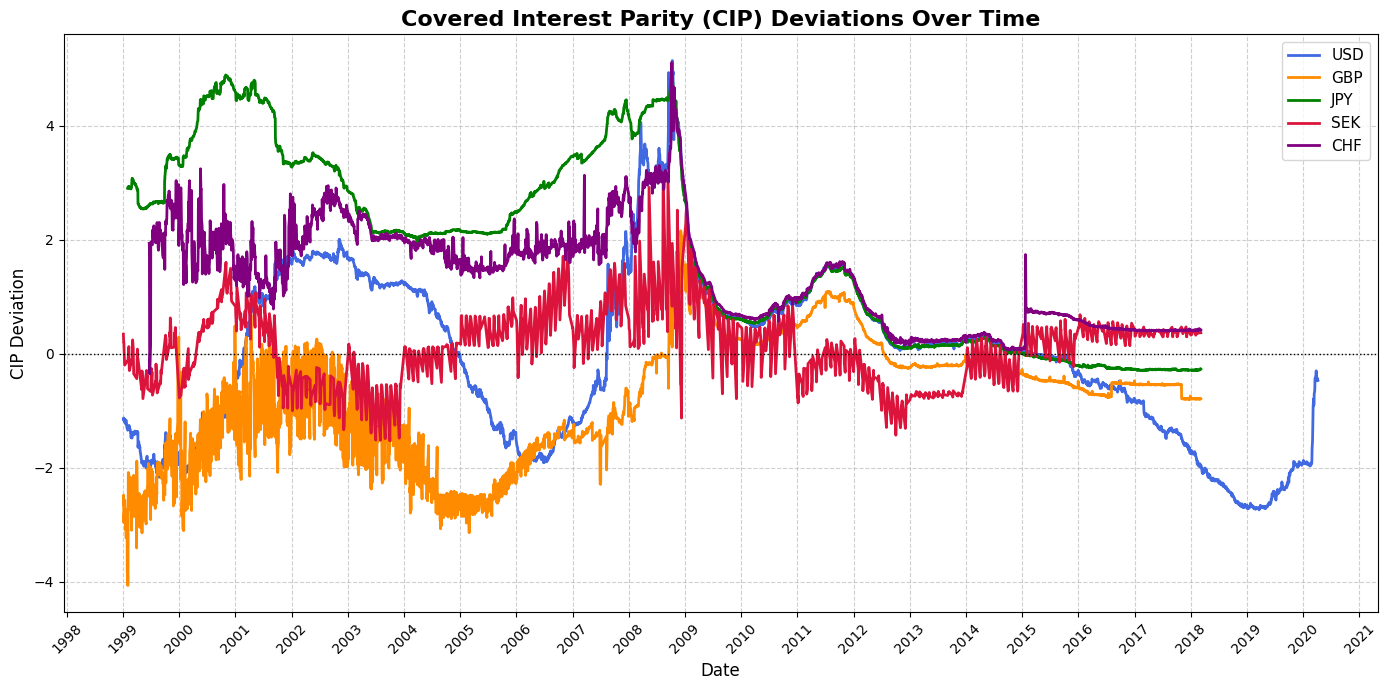

In [38]:
#PLOTTING CIP DEVIATIONS FOR ALL CURRENCIES


# Ensure 'Date' is datetime and sorted
merged["Date"] = pd.to_datetime(merged["Date"], errors='coerce')
merged = merged.sort_values("Date")

# List of CIP deviation columns and labels
cip_columns = {
    "x_usd": "USD",
    "x_gbp": "GBP",
    "x_jpy": "JPY",
    "x_sek": "SEK",
    "x_chf": "CHF"
}

# Color palette
colors = ["royalblue", "darkorange", "green", "crimson", "purple"]

# Create figure
plt.figure(figsize=(14, 7))

for (col, label), color in zip(cip_columns.items(), colors):
    # Drop NaNs to avoid broken lines
    temp = merged[["Date", col]].dropna()
    if temp.empty:
        continue  # skip if no data
    plt.plot(temp["Date"], temp[col], label=f"{label}", color=color, linewidth=2)

# Formatting
plt.title("Covered Interest Parity (CIP) Deviations Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("CIP Deviation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# X-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Zero line
plt.axhline(0, color='black', linestyle=':', linewidth=1)

# Legend and layout
plt.legend(loc="upper right", fontsize=11)
plt.tight_layout()

# Save & Show
plt.savefig("CIP_Deviations_AllCurrencies_Cleaned.png", dpi=300)
plt.show()


In [39]:

# DOWNLOAD AND PREPARE 'STOXX50E_realized_vol_21d'
# -----------------------------
stoxx = yf.download('^STOXX50E', start='2000-01-01', end='2024-12-31')
stoxx['log_return'] = np.log(stoxx['Close'] / stoxx['Close'].shift(1))
stoxx['realized_vol_21d'] = stoxx['log_return'].rolling(window=21).std() * np.sqrt(252)
STOXX50E_realized_vol_21d = stoxx.reset_index()[['Date', 'realized_vol_21d']]
STOXX50E_realized_vol_21d.rename(columns={'realized_vol_21d': 'STOXX50E_realized_vol_21d'}, inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [40]:
# -----------------------------
# DOWNLOAD iShares MSCI Europe Financials
# -----------------------------
data = yf.download('EUFN', start='2000-01-01').reset_index()
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,EUFN,EUFN,EUFN,EUFN,EUFN
0,2010-02-03,13.012832,13.012832,13.012832,13.012832,700
1,2010-02-04,13.012832,13.012832,13.012832,13.012832,0
2,2010-02-05,13.012832,13.012832,13.012832,13.012832,0
3,2010-02-08,13.012832,13.012832,13.012832,13.012832,0
4,2010-02-09,12.139525,12.139525,12.099041,12.099041,1800


In [41]:
#PREPARING DATASET

dfs = [df_EONIA_ESTR, df_EURIBOR, df_IG_OAS, df_YieldCorporateBondIndex, df_YieldonAAAratedbondindex, df_Italiangovbonds, df_Germangovbonds, STOXX50E_realized_vol_21d, df_DAX, df_CAC, df_SX7E]
dfs

[           Date      1
 0    1999-01-04  3.200
 1    1999-01-05  3.200
 2    1999-01-06  3.210
 3    1999-01-07  3.210
 4    1999-01-08  3.210
 ...         ...    ...
 6874 2025-05-09  2.169
 6875 2025-05-12  2.170
 6876 2025-05-13  2.172
 6877 2025-05-14  2.172
 6878 2025-05-15  2.172
 
 [6879 rows x 2 columns],
           Date       2
 0   1994-01-31  6.9100
 1   1994-02-28  6.8600
 2   1994-03-31  6.7500
 3   1994-04-30  6.5700
 4   1994-05-31  6.2400
 ..         ...     ...
 371 2024-12-31  2.8161
 372 2025-01-31  2.7031
 373 2025-02-28  2.5249
 374 2025-03-31  2.4424
 375 2025-04-30  2.2482
 
 [376 rows x 2 columns],
            Date     4
 0    1997-12-31  6.27
 1    1998-01-01   NaN
 2    1998-01-02  6.32
 3    1998-01-05  6.32
 4    1998-01-06  6.32
 ...         ...   ...
 7229 2025-05-09  3.49
 7230 2025-05-12  3.27
 7231 2025-05-13  3.23
 7232 2025-05-14  3.19
 7233 2025-05-15  3.28
 
 [7234 rows x 2 columns],
             Date    5_1
 0     1997-12-31  11.39
 1     1998-01-

In [42]:
# -----------------------------
# CLEAN EACH DATAFRAME
# -----------------------------
for i, df in enumerate(dfs):
    # Clean column names
    df.columns = df.columns.map(str).str.strip()

    if 'Date' not in df.columns:
        df.reset_index(inplace=True)

        # Find any column that looks like a date column after reset_index
        possible_date_cols = [col for col in df.columns if 'date' in col.lower()]

        if possible_date_cols:
            # Rename the first found date-like column to 'Date'
            df.rename(columns={possible_date_cols[0]: 'Date'}, inplace=True)
        else:
            # Fallback: rename the first column to 'Date'
            df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    # Convert 'Date' column to datetime (coerce errors to NaT)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    dfs[i] = df

In [43]:
# -----------------------------
# MERGE ALL ON 'Date'
# -----------------------------
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer', suffixes=('', '_dup'))
    dup_cols = [col for col in merged_df.columns if col.endswith('_dup')]
    merged_df.drop(columns=dup_cols, inplace=True)

merged_df = merged_df.sort_values('Date').reset_index(drop=True)
merged_df.head()

,Date,1,2,4,5_1,5_2,6.1,6.2,index,"('STOXX50E_realized_vol_21d', '')",10.1,10.2,11
0,1957-01-01,NaN,NaN,NaN,NaN,NaN,NaN,7.516667,NaN,NaN,NaN,NaN,NaN
1,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,6.783333,NaN,NaN,NaN,NaN,NaN
2,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5.766667,NaN,NaN,NaN,NaN,NaN
3,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,NaN
4,1959-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.75,NaN,NaN


In [44]:
# -----------------------------
#DERIVE VARIABLES NEEDED
# -----------------------------
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Merge monthly data for variables '2' and '3' if exist
if set(['Year', 'Month', '2', '3']).issubset(merged_df.columns):
    monthly_data = merged_df[['Year', 'Month', '2', '3']].drop_duplicates()
    merged_df = merged_df.drop(columns=['2', '3'], errors='ignore')
    merged_df = pd.merge(merged_df, monthly_data, on=['Year', 'Month'], how='left')

# Merge yearly data for variables '6.1' and '6.2' if exist
if set(['Year', '6.1', '6.2']).issubset(merged_df.columns):
    yearly_data = merged_df[['Year', '6.1', '6.2']].drop_duplicates()
    merged_df = merged_df.drop(columns=['6.1', '6.2'], errors='ignore')
    merged_df = pd.merge(merged_df, yearly_data, on='Year', how='left')

# Convert selected columns to numeric
for col in ['1', '2', '6.1', '6.2', '10.1', '10.2']:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Calculate derived columns
merged_df['3'] = merged_df['2'] - merged_df['1'] if all(c in merged_df.columns for c in ['2', '1']) else np.nan
merged_df['5'] = merged_df['5_1'] - merged_df['5_2'] if all(c in merged_df.columns for c in ['5_1', '5_2']) else np.nan
merged_df['7'] = merged_df['6.1'] - merged_df['6.2'] if all(c in merged_df.columns for c in ['6.1', '6.2']) else np.nan

# Rolling correlation for variable '10'
if all(c in merged_df.columns for c in ['10.1', '10.2']):
    merged_df['10'] = merged_df['10.1'].rolling(window=30, min_periods=10).corr(merged_df['10.2'])

merged_df.head()


,Date,1,2,4,5_1,5_2,index,"('STOXX50E_realized_vol_21d', '')",10.1,10.2,11,Year,Month,6.1,6.2,3,5,7,10
0,1957-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957,1,NaN,7.516667,NaN,NaN,NaN,NaN
1,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958,1,NaN,6.783333,NaN,NaN,NaN,NaN
2,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,1,NaN,5.766667,NaN,NaN,NaN,NaN
3,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,NaN,1959,9,NaN,5.766667,NaN,NaN,NaN,NaN


In [45]:
#FURTHER CLEANING

# Flatten any multi-level columns
merged_df.columns = [col if isinstance(col, str) else col[0] for col in merged_df.columns]
# Rename any unwanted 'Unnamed' columns (if present)
rename_map = {
    'Unnamed: 1': '1',
    'Unnamed: 2': '2',
    'Unnamed: 3': '3',
    'Unnamed: 4': '4',
    'Unnamed: 5': '5',
    'Unnamed: 6': '6_1',
    'Unnamed: 7': '6_2',
    'Unnamed: 8': '8',
    'Unnamed: 9': '10_1',
    'Unnamed: 10': '10_2',
}
merged_df.rename(columns=rename_map, inplace=True)

merged_df.head(10)


,Date,1,2,4,5_1,5_2,index,"('STOXX50E_realized_vol_21d', '')",10.1,10.2,11,Year,Month,6.1,6.2,3,5,7,10
0,1957-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957,1,NaN,7.516667,NaN,NaN,NaN,NaN
1,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958,1,NaN,6.783333,NaN,NaN,NaN,NaN
2,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,1,NaN,5.766667,NaN,NaN,NaN,NaN
3,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,NaN,1959,9,NaN,5.766667,NaN,NaN,NaN,NaN
5,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,NaN,1959,9,NaN,NaN,NaN,NaN,NaN,NaN
6,1959-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.75,NaN,NaN,1959,9,NaN,5.766667,NaN,NaN,NaN,NaN
7,1959-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.75,NaN,NaN,1959,9,NaN,NaN,NaN,NaN,NaN,NaN
8,1959-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.31,NaN,NaN,1959,9,NaN,5.766667,NaN,NaN,NaN,NaN
9,1959-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.31,NaN,NaN,1959,9,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Create MARKET Block Indicators ---
# Ensure numeric columns for averaging
merged_df['money_block'] = merged_df[['1', '2', '3']].mean(axis=1, skipna=True)
merged_df['bond_block'] = merged_df[['4', '5', '7']].mean(axis=1, skipna=True)
merged_df['equity_block'] = merged_df[["('STOXX50E_realized_vol_21d', '')"]].mean(axis=1, skipna=True)  # Updated: Include '11'
merged_df['fin_block'] = merged_df[['10']].mean(axis=1, skipna=True)

merged_df.head()

,Date,1,2,4,5_1,5_2,index,"('STOXX50E_realized_vol_21d', '')",10.1,10.2,...,6.1,6.2,3,5,7,10,money_block,bond_block,equity_block,fin_block
0,1957-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,...,NaN,5.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Chaecking missing values

# Check for missing values in block indicators
print(merged_df[['money_block', 'bond_block', 'equity_block', 'fin_block']].isna().sum())

# --- Step 3: Clean and Prepare for Systemic Correlation ---
block_cols = ['money_block', 'bond_block', 'equity_block', 'fin_block']
existing_blocks = [col for col in block_cols if col in merged_df.columns]

# Drop rows with NaNs in these block columns
merged_df_clean = merged_df.dropna(subset=existing_blocks).reset_index(drop=True)

merged_df.head(5)


money_block     44985
bond_block      40025
equity_block    76011
fin_block        8439
dtype: int64


,Date,1,2,4,5_1,5_2,index,"('STOXX50E_realized_vol_21d', '')",10.1,10.2,...,6.1,6.2,3,5,7,10,money_block,bond_block,equity_block,fin_block
0,1957-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.93,NaN,...,NaN,5.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Defining functions for analysis
def gaussian_kernel(dist, h):
    return np.exp(-0.5 * (dist / h)**2)

def kernel_quantile_estimate(X_train, y_train, X_pred, tau, h, kernel_func):
    dists = cdist(X_pred, X_train)
    weights = kernel_func(dists, h)
    quantiles = []
    for i in range(weights.shape[0]):
        w = weights[i]
        if np.all(w == 0) or np.isnan(w).any():
            quantiles.append(np.nan)
            continue
        sorted_idx = np.argsort(y_train)
        y_sorted = y_train[sorted_idx]
        w_sorted = w[sorted_idx]
        w_cumsum = np.cumsum(w_sorted)
        if w_cumsum[-1] == 0:
            quantiles.append(np.nan)
            continue
        w_cumsum /= w_cumsum[-1]
        idx = np.searchsorted(w_cumsum, tau)
        q_value = y_sorted[min(idx, len(y_sorted) - 1)]
        quantiles.append(float(q_value))
    return np.array(quantiles)

def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

In [49]:
# Define Currencies for final analysis

currencies = {
    "usd": {"x": "x_usd", "trading_cost": "TradingCost_usd", "spot": "USD"},
    "gbp": {"x": "x_gbp", "trading_cost": "TradingCost_gbp", "spot": "GBP"},
    "jpy": {"x": "x_jpy", "trading_cost": "TradingCost_jpy", "spot": "JPY"},
    "sek": {"x": "x_sek", "trading_cost": "TradingCost_sek", "spot": "SEK"},
    "chf": {"x": "x_chf", "trading_cost": "TradingCost_chf", "spot": "CHF"},
}

In [50]:
#Sort and reset merged (your base DF)
merged = merged.sort_values("Date").reset_index(drop=True)
merged.head(10000)

,Date,ForwardRateUSDtoEUR,ForwardRateUSDtoEUR_low,ForwardRateUSDtoEUR_high,SpotRateUSDtoEUR,USDTreasuryRate,EUROBIR,USD,JPY,SEK,...,ForwardSpread_usd,TradingCost_usd,ForwardSpread_gbp,TradingCost_gbp,ForwardSpread_jpy,TradingCost_jpy,ForwardSpread_sek,TradingCost_sek,ForwardSpread_chf,TradingCost_chf
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,3.244,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-04,0.845666,0.838012,0.854847,0.846597,4.38,3.234,1.1789,133.73,9.4696,...,0.0235,0.019895,0.0137,0.019266,3.53,0.026396,0.1655,0.017477,0.0255,0.015772
4,1999-01-05,0.850268,0.840901,0.852297,0.850340,4.37,3.223,1.1790,130.96,9.4025,...,0.0159,0.013520,0.0099,0.013901,3.11,0.023748,0.1673,0.017793,0.0221,0.013707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,2025-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.016797,NaN,0.005921,NaN,0.006621,NaN,0.007374,NaN,0.007539
9662,2025-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.016797,NaN,0.005921,NaN,0.006621,NaN,0.007374,NaN,0.007539
9663,2025-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.016797,NaN,0.005921,NaN,0.006621,NaN,0.007374,NaN,0.007539
9664,2025-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.016797,NaN,0.005921,NaN,0.006621,NaN,0.007374,NaN,0.007539


In [51]:
#Loop 1

# Create lag columns for all currencies

for curr, params in currencies.items():
    merged[f"{params['x']}_lag_1"] = merged[params["x"]].shift(1)

results = {}
data2_clean_all = None  # This will hold merged data with all currencies’ bandwidth



====== Processing: USD ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0001
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     340.1
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           5.59e-73
Time:                        08:03:15   Log-Likelihood:                 3265.0
No. Observations:                4043   AIC:                            -6526.
Df Residuals:                    4041   BIC:                            -6513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-52-2557453176>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-52-2557453176>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


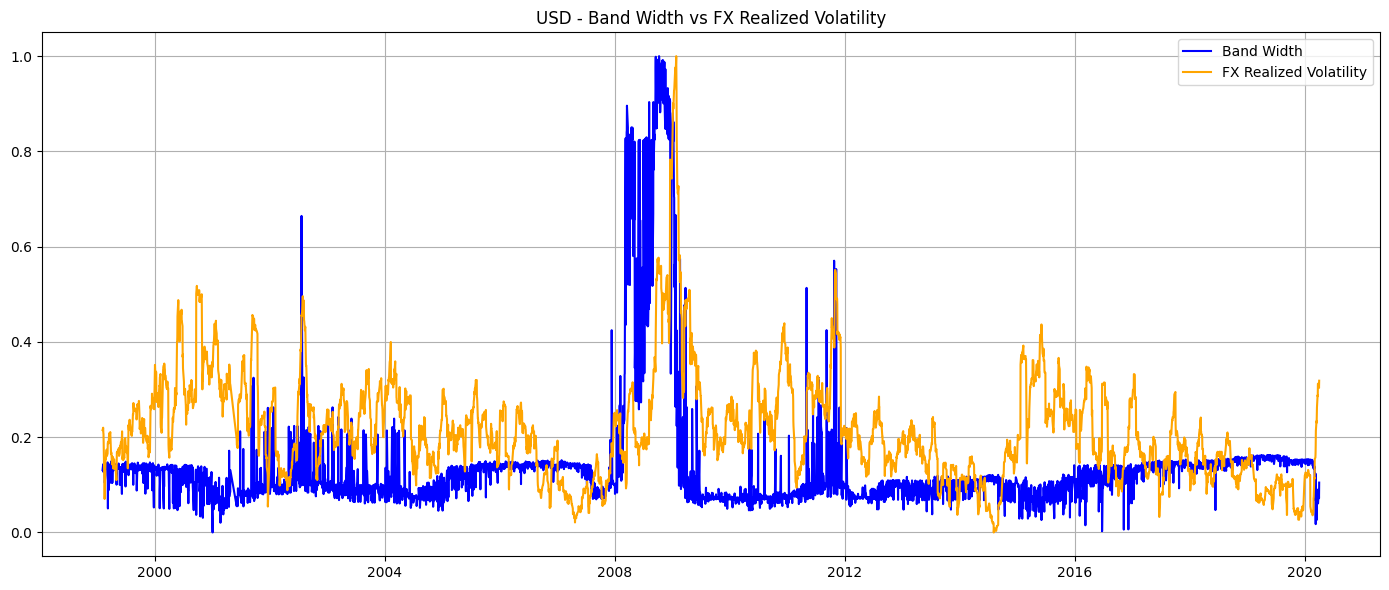



====== Processing: GBP ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0002
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     477.3
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          8.99e-100
Time:                        08:03:20   Log-Likelihood:                 2856.6
No. Observations:                3796   AIC:                            -5709.
Df Residuals:                    3794   BIC:                            -5697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-52-2557453176>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-52-2557453176>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


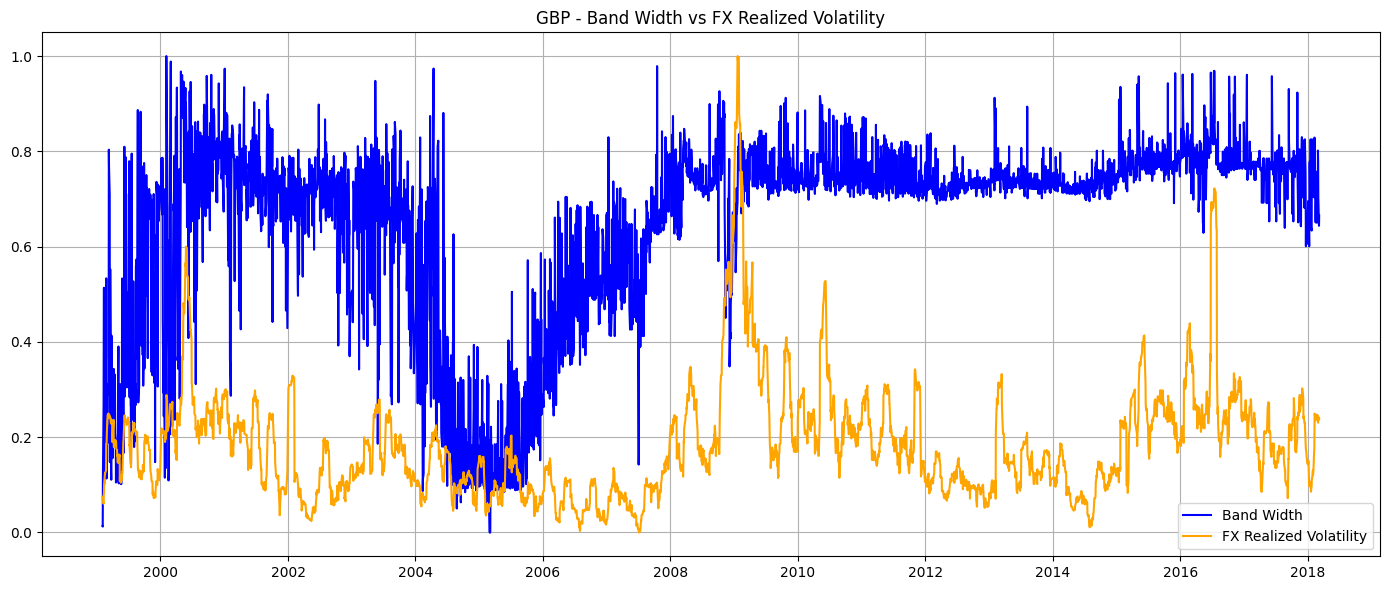



====== Processing: JPY ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0001
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     699.5
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          8.94e-142
Time:                        08:03:23   Log-Likelihood:                 2791.9
No. Observations:                3853   AIC:                            -5580.
Df Residuals:                    3851   BIC:                            -5567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-52-2557453176>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-52-2557453176>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


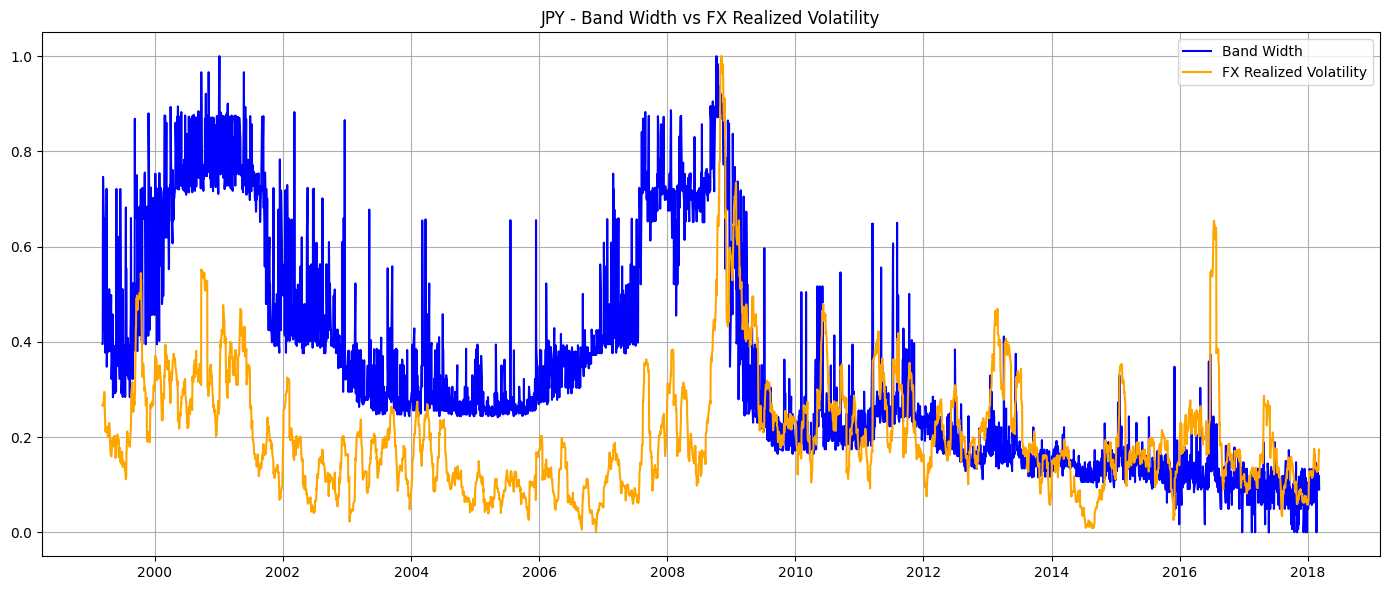



====== Processing: SEK ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0016
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     48.27
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.01e-11
Time:                        08:03:23   Log-Likelihood:                 248.01
No. Observations:                 576   AIC:                            -492.0
Df Residuals:                     574   BIC:                            -483.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-52-2557453176>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-52-2557453176>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


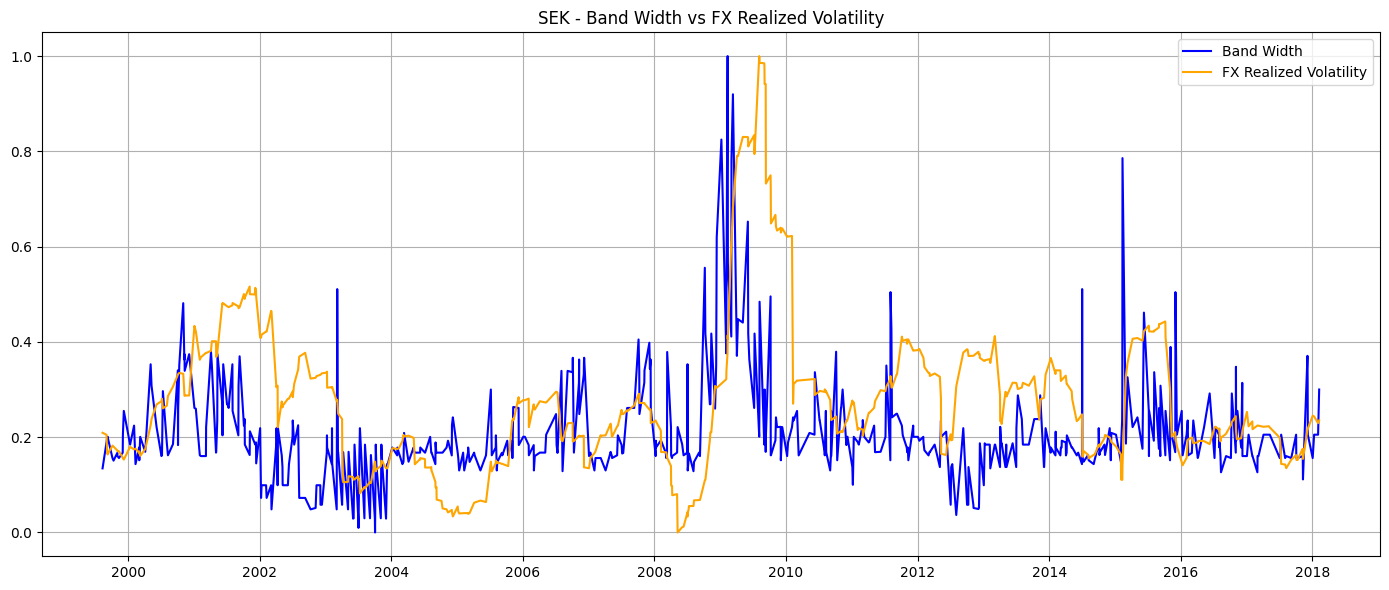



====== Processing: CHF ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0000
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     78.91
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           9.99e-19
Time:                        08:03:26   Log-Likelihood:                 3415.1
No. Observations:                3662   AIC:                            -6826.
Df Residuals:                    3660   BIC:                            -6814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-52-2557453176>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-52-2557453176>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


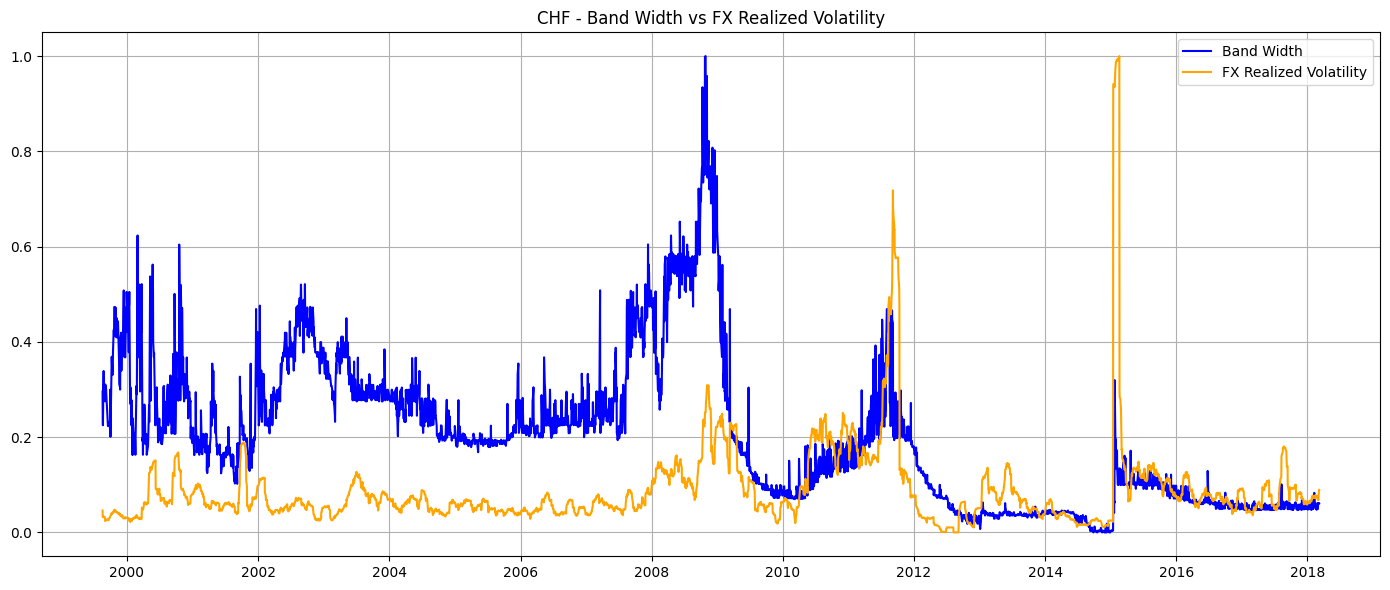

In [52]:
#Loop 2

for curr, params in currencies.items():
    print(f"\n\n====== Processing: {curr.upper()} ======\n")

    x_col = params["x"]
    cost_col = params["trading_cost"]
    spot_col = params["spot"]
    lag_col = f"{x_col}_lag_1"

    data = merged.copy().dropna(subset=[x_col, cost_col, lag_col])

    # Winsorize trading cost
    data[cost_col] = winsorize(data[cost_col].values, limits=[0.01, 0.01])

    # Macro features + PCA
    block_cols = ["bond_block", "equity_block", "fin_block", "money_block"]
    macro_features = [lag_col] + [col for col in block_cols if col in data.columns]
    X_macro = StandardScaler().fit_transform(data[macro_features])
    X_pca = PCA(n_components=0.95).fit_transform(X_macro)

    y = data[x_col].values
    tc_scaled = StandardScaler().fit_transform(data[cost_col].values.reshape(-1, 1))
    mask = ~(np.isnan(X_macro).any(axis=1) | np.isnan(tc_scaled).any(axis=1) | np.isnan(y))
    X_final = np.hstack([X_pca, tc_scaled])[mask]
    y_clean = y[mask]
    data2_clean = data.loc[mask].reset_index(drop=True)

    X_final_scaled = StandardScaler().fit_transform(X_final)

    # Quantile estimates
    for tau in [0.05, 0.95]:
        print(f"Estimating τ = {tau}")
        data2_clean[f"Q{tau*100:.1f}"] = kernel_quantile_estimate(
            X_final_scaled, y_clean, X_final_scaled, tau, 3, gaussian_kernel
        )

    data2_clean = data2_clean.dropna(subset=["Q95.0", "Q5.0"])
    data2_clean["Band_Width"] = (data2_clean["Q95.0"] - data2_clean["Q5.0"]).clip(lower=1e-4)

    eps = 1e-6
    data2_clean["CIP_Stress"] = np.where(
        (y_clean < (data2_clean["Q5.0"] - eps)) | (y_clean > (data2_clean["Q95.0"] + eps)),
        np.maximum(np.abs(y_clean - data2_clean["Q5.0"]), np.abs(y_clean - data2_clean["Q95.0"])),
        0
    )
    data2_clean["CIP_Stress_Log"] = np.log1p(data2_clean["CIP_Stress"])

    data2_clean["Date"] = pd.to_datetime(data2_clean["Date"], errors='coerce')
    data2_clean = data2_clean.set_index("Date")

    spot_rate = data2_clean[spot_col].dropna()
    data2_clean["Log_Returns"] = np.log(spot_rate / spot_rate.shift(1))
    data2_clean["Rolling_Volatility"] = data2_clean["Log_Returns"].rolling(20).std() * np.sqrt(252)

    data2_clean["Band_Width_scaled"] = min_max_scale(data2_clean["Band_Width"])
    data2_clean["FX_RealizedVol_scaled"] = min_max_scale(data2_clean["Rolling_Volatility"])

    comp_data = data2_clean.dropna(subset=["Band_Width_scaled", "FX_RealizedVol_scaled"])

    # Cointegration test
    coint_stat, p_value, _ = coint(comp_data["FX_RealizedVol_scaled"], comp_data["Band_Width_scaled"])
    print(f"Cointegration test p-value: {p_value:.4f}")

    if p_value > 0.15:
        print("=> No cointegration. Using first differences.")
        comp_data["BW"] = comp_data["Band_Width_scaled"].diff()
        comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"].diff()
    else:
        print("=> Cointegrated. Using levels.")
        comp_data["BW"] = comp_data["Band_Width_scaled"]
        comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]

    comp_data = comp_data.dropna(subset=["BW", "VOL"])

    X = sm.add_constant(comp_data["BW"])
    y = comp_data["VOL"]
    model = sm.OLS(y, X).fit()
    print(model.summary())

    results[curr] = {"data": data2_clean, "model": model}

    # Prepare columns with currency suffix
    currency_suffix = f"_{curr}"
    cols_to_merge = ["Band_Width", "Band_Width_scaled", "CIP_Stress", "CIP_Stress_Log", "FX_RealizedVol_scaled"]

    data_to_merge = data2_clean[cols_to_merge].copy()
    data_to_merge.columns = [col + currency_suffix for col in cols_to_merge]

    # Merge into global data2_clean_all on index=Date
    if data2_clean_all is None:
        data2_clean_all = data_to_merge
    else:
        data2_clean_all = data2_clean_all.join(data_to_merge, how='outer')

    # Plot Band Width vs Volatility
    plt.figure(figsize=(14,6))
    plt.plot(comp_data.index, comp_data["Band_Width_scaled"], label="Band Width", color="blue")
    plt.plot(comp_data.index, comp_data["FX_RealizedVol_scaled"], label="FX Realized Volatility", color="orange")
    plt.title(f"{curr.upper()} - Band Width vs FX Realized Volatility")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [53]:
data2_clean_all.head(10000)


,Band_Width_usd,Band_Width_scaled_usd,CIP_Stress_usd,CIP_Stress_Log_usd,FX_RealizedVol_scaled_usd,Band_Width_gbp,Band_Width_scaled_gbp,CIP_Stress_gbp,CIP_Stress_Log_gbp,FX_RealizedVol_scaled_gbp,...,Band_Width_sek,Band_Width_scaled_sek,CIP_Stress_sek,CIP_Stress_Log_sek,FX_RealizedVol_scaled_sek,Band_Width_chf,Band_Width_scaled_chf,CIP_Stress_chf,CIP_Stress_Log_chf,FX_RealizedVol_scaled_chf
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,4.037362,0.105869,0.0,0.0,NaN,3.356561,0.518880,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,3.958369,0.045694,0.0,0.0,NaN,3.496914,0.965433,3.653584,1.537638,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,4.037362,0.105869,0.0,0.0,NaN,3.320488,0.404108,3.647155,1.536255,NaN,...,2.065416,0.485148,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,3.999233,0.076823,0.0,0.0,NaN,3.273379,0.254224,3.483332,1.500366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-12,4.064066,0.126212,0.0,0.0,NaN,3.283814,0.287426,3.291009,1.456522,NaN,...,2.019172,0.355949,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,3.978623,0.061123,0.0,0.0,0.312384,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,4.018242,0.091304,0.0,0.0,0.312118,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,4.014527,0.088474,0.0,0.0,0.311709,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


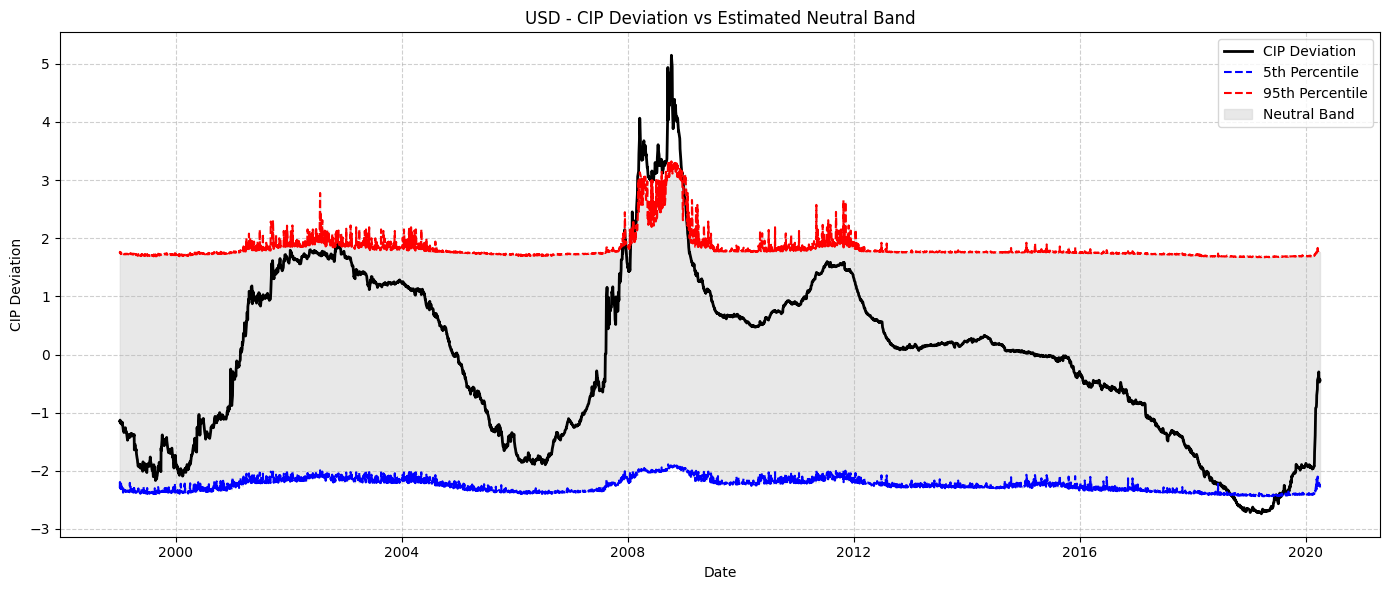

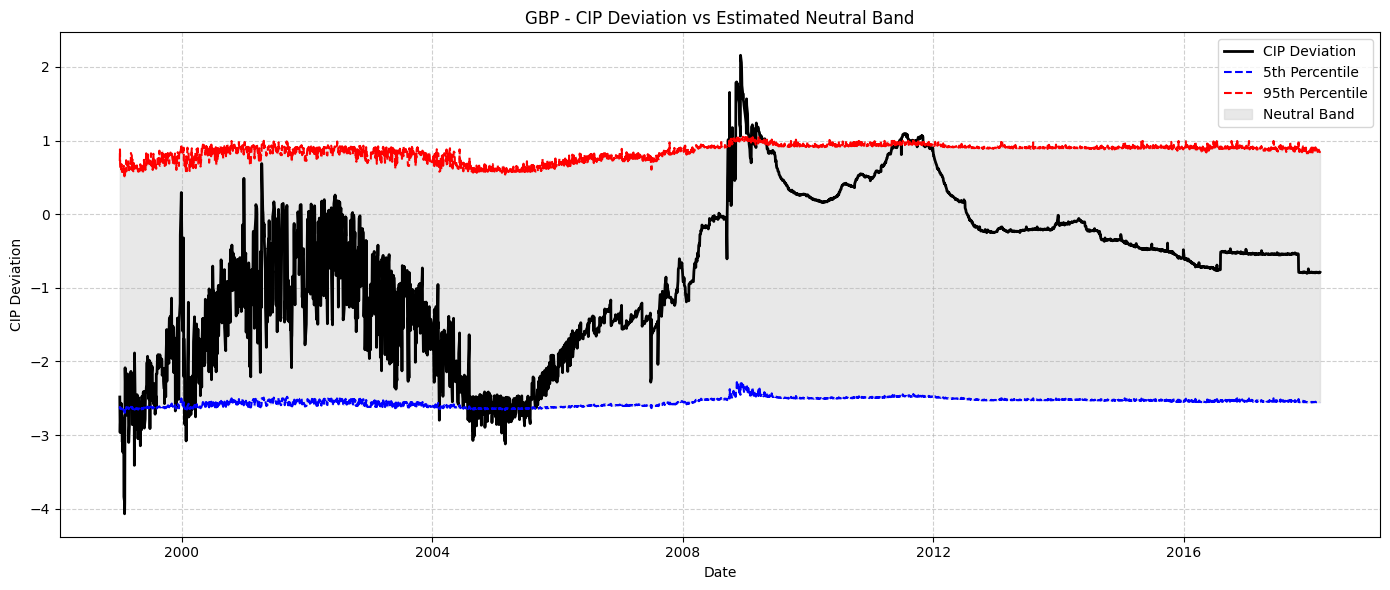

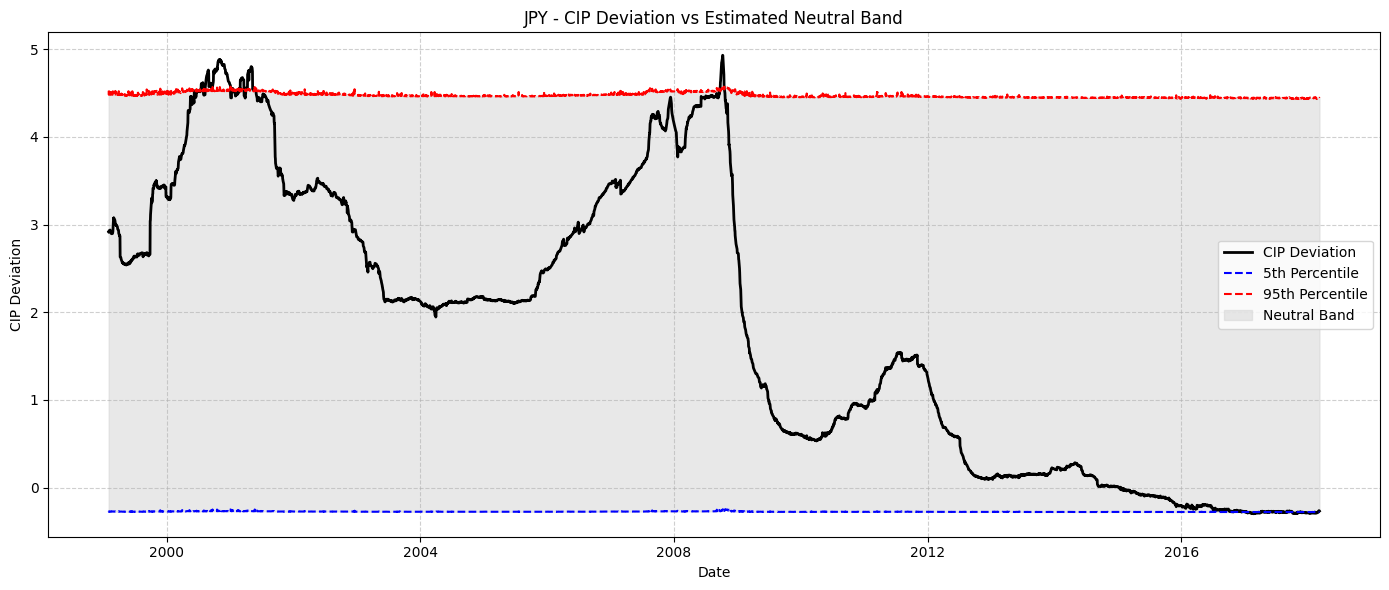

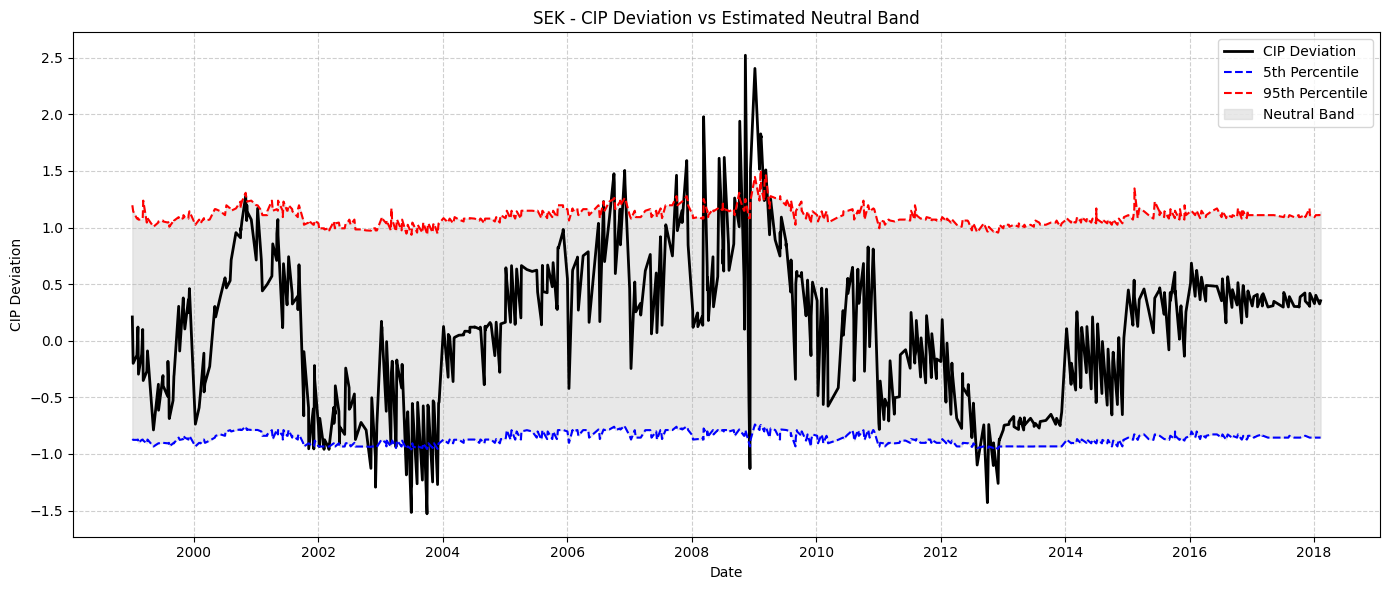

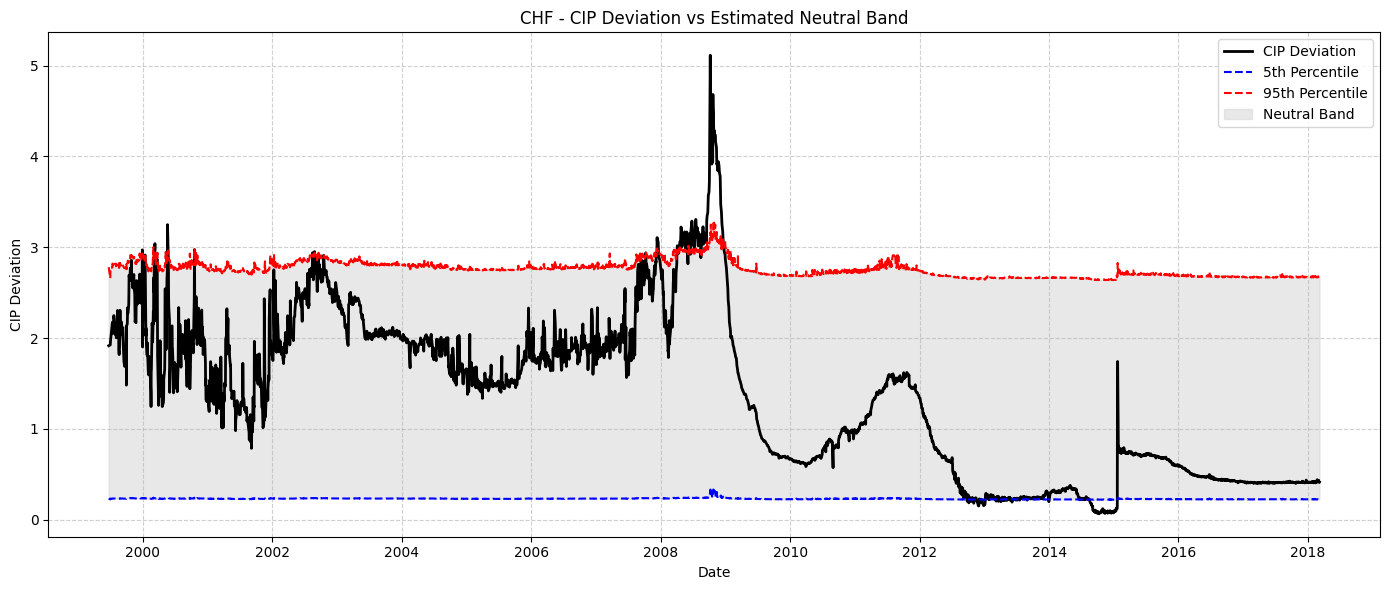

In [54]:
# Plot CIP deviation and neutral band for each currency
for curr, result in results.items():
    df = result["data"].copy()
    x_col = currencies[curr]["x"]

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[x_col], label="CIP Deviation", color="black", linewidth=2)
    plt.plot(df.index, df["Q5.0"], label="5th Percentile", color="blue", linestyle="--")
    plt.plot(df.index, df["Q95.0"], label="95th Percentile", color="red", linestyle="--")
    plt.fill_between(df.index, df["Q5.0"], df["Q95.0"], color="lightgray", alpha=0.5, label="Neutral Band")

    plt.title(f"{curr.upper()} - CIP Deviation vs Estimated Neutral Band")
    plt.xlabel("Date")
    plt.ylabel("CIP Deviation")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [55]:
#Starting the process to construct a new systemic risk indicator

# Prepare the FX block by combining scaled bandwidths from all currencies ---

# Assume data2_clean is your combined DataFrame with these columns:
# 'Band_Width_scaled_usd', 'Band_Width_scaled_gbp', 'Band_Width_scaled_jpy', 'Band_Width_scaled_sek', 'Band_Width_scaled_chf'

fx_cols = [
    "Band_Width_scaled_usd",
    "Band_Width_scaled_gbp",
    "Band_Width_scaled_jpy",
    "Band_Width_scaled_sek",
    "Band_Width_scaled_chf",
]

# Check columns exist
fx_cols = [col for col in fx_cols if col in data2_clean_all.columns]

# Drop rows with missing FX bandwidth data to ensure clean input for PCA
fx_data = data2_clean_all[fx_cols].dropna()

# Standardize FX block components (mean 0, std 1)
scaler_fx = StandardScaler()
fx_scaled = scaler_fx.fit_transform(fx_data)

# Apply PCA on FX scaled data and take first principal component as FX block score
pca_fx = PCA(n_components=1)
fx_block_scores = pca_fx.fit_transform(fx_scaled).flatten()

# Insert FX block score back into data2_clean aligned by index
fx_block_series = pd.Series(fx_block_scores, index=fx_data.index, name="fx_block")

# Add the fx_block to your main DataFrame (aligning on index)
data2_clean = data2_clean_all.join(fx_block_series, how='left')

data2_clean.head(10000)

,Band_Width_usd,Band_Width_scaled_usd,CIP_Stress_usd,CIP_Stress_Log_usd,FX_RealizedVol_scaled_usd,Band_Width_gbp,Band_Width_scaled_gbp,CIP_Stress_gbp,CIP_Stress_Log_gbp,FX_RealizedVol_scaled_gbp,...,Band_Width_scaled_sek,CIP_Stress_sek,CIP_Stress_Log_sek,FX_RealizedVol_scaled_sek,Band_Width_chf,Band_Width_scaled_chf,CIP_Stress_chf,CIP_Stress_Log_chf,FX_RealizedVol_scaled_chf,fx_block
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,4.037362,0.105869,0.0,0.0,NaN,3.356561,0.518880,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,3.958369,0.045694,0.0,0.0,NaN,3.496914,0.965433,3.653584,1.537638,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,4.037362,0.105869,0.0,0.0,NaN,3.320488,0.404108,3.647155,1.536255,NaN,...,0.485148,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,3.999233,0.076823,0.0,0.0,NaN,3.273379,0.254224,3.483332,1.500366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-12,4.064066,0.126212,0.0,0.0,NaN,3.283814,0.287426,3.291009,1.456522,NaN,...,0.355949,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,3.978623,0.061123,0.0,0.0,0.312384,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,4.018242,0.091304,0.0,0.0,0.312118,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,4.014527,0.088474,0.0,0.0,0.311709,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Prepare other blocks ---

# List all block columns expected in data2_clean (except fx_block just created)
# Make sure these blocks exist in your DataFrame
other_blocks = ["money_block", "bond_block", "equity_block", "fin_block"]

# Filter to those columns existing in data2_clean
other_blocks = [col for col in other_blocks if col in data2_clean.columns]

# Subset dataframe for blocks + fx_block and drop rows with missing data
blocks_df = data2_clean[other_blocks + ["fx_block"]].dropna()

# Standardize all blocks (mean 0, std 1)
scaler_blocks = StandardScaler()
blocks_scaled = scaler_blocks.fit_transform(blocks_df)

print (blocks_scaled)


[[ 1.14580764e-01]
 [ 1.98415891e-01]
 [ 1.38747212e-01]
 [ 4.23784815e-02]
 [ 8.96341633e-02]
 [ 2.83951437e-01]
 [ 2.48002237e-01]
 [ 7.31662349e-01]
 [ 1.07639928e+00]
 [ 1.01525991e+00]
 [ 5.49251247e-01]
 [ 5.96495444e-01]
 [ 7.29730008e-01]
 [ 9.45805157e-01]
 [ 5.45686007e-01]
 [ 9.04177281e-02]
 [ 8.96988517e-01]
 [ 9.71127563e-01]
 [ 1.29488700e+00]
 [ 4.04213280e-01]
 [ 1.18052925e+00]
 [ 1.34883161e+00]
 [ 6.90139056e-01]
 [ 5.36792728e-01]
 [ 6.13518383e-01]
 [ 8.55478313e-01]
 [ 6.85145535e-01]
 [ 6.65065951e-01]
 [ 1.25351320e+00]
 [ 7.72443935e-01]
 [ 9.61673323e-01]
 [ 1.08940779e+00]
 [ 1.40155870e+00]
 [ 1.29547497e+00]
 [ 1.34943818e+00]
 [ 1.08970573e+00]
 [ 1.06150256e+00]
 [ 7.36141046e-01]
 [ 3.95023735e-01]
 [ 5.30302015e-01]
 [ 4.03764053e-01]
 [ 4.37609287e-01]
 [ 8.06474378e-01]
 [ 8.76334753e-01]
 [ 7.08232532e-01]
 [ 6.43528078e-01]
 [ 7.74710994e-01]
 [ 8.15385583e-01]
 [ 4.28581411e-01]
 [ 3.14704824e-01]
 [ 5.10486707e-01]
 [ 4.36038850e-01]
 [ 6.8653828

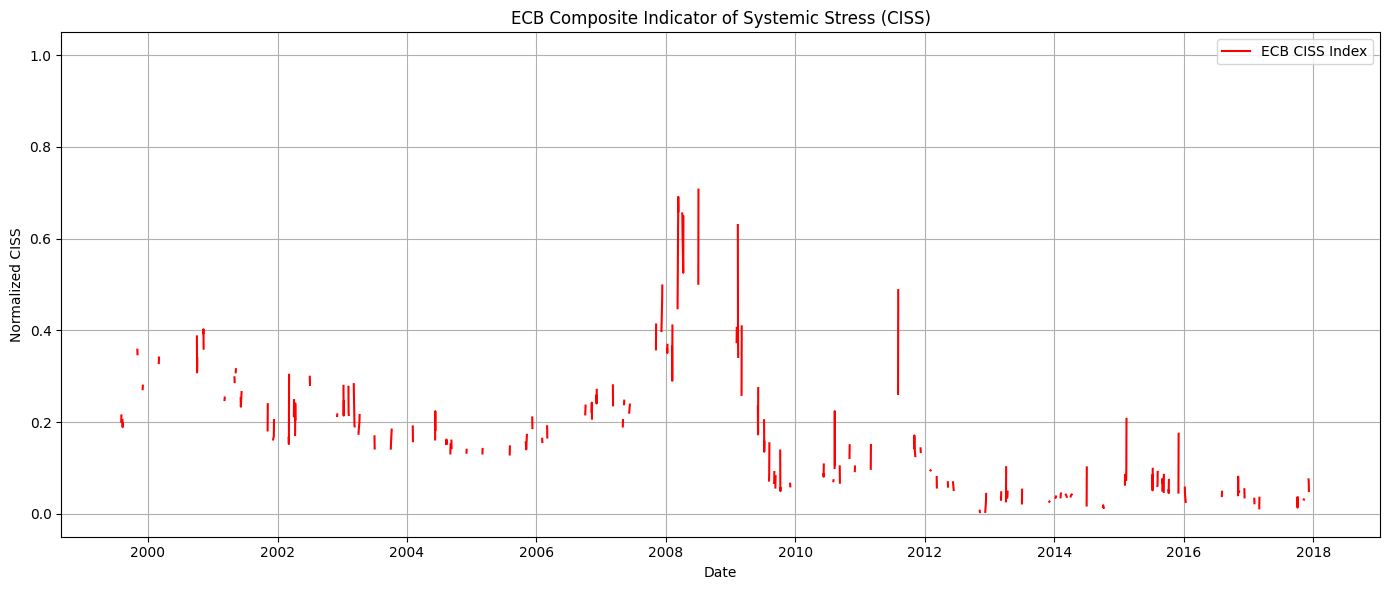

In [57]:
# Compute CISS according to official ECB methodology ---

# Covariance matrix of standardized blocks
cov_matrix = np.cov(blocks_scaled.T)

# PCA on covariance matrix
pca = PCA(n_components=1)
# Fit PCA on covariance matrix by trick: eigen decomposition of covariance matrix
# We can just use pca.fit(blocks_scaled), first PC explains systemic risk
ciss_scores = pca.fit_transform(blocks_scaled).flatten()

# Normalize CISS to [0,1]
ciss_min, ciss_max = ciss_scores.min(), ciss_scores.max()
ciss_norm = (ciss_scores - ciss_min) / (ciss_max - ciss_min)

# Create final CISS Series aligned with blocks_df index
ciss_series = pd.Series(ciss_norm, index=blocks_df.index, name="CISS")

# Join CISS back to data2_clean
data2_clean = data2_clean.join(ciss_series, how="left")

# Plot the CISS index

plt.figure(figsize=(14,6))
plt.plot(data2_clean.index, data2_clean["CISS"], label="ECB CISS Index", color="red")
plt.title("ECB Composite Indicator of Systemic Stress (CISS)")
plt.xlabel("Date")
plt.ylabel("Normalized CISS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# Load official ECB CISS
official_ecb = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ecb_ciss.xlsx", engine="openpyxl", header=1)
official_ecb["Date"] = pd.to_datetime(official_ecb["Date"], errors='coerce')
official_ecb = official_ecb.set_index("Date")

# Extract official CISS column (adjust column name if different)
official_ciss = official_ecb["ECB_CISS"]

In [59]:
# Align with your constructed CISS (assuming 'CISS' column exists in data2_clean)
comparison_df = pd.DataFrame({
    "Official ECB CISS": official_ciss,
    "Constructed CISS": data2_clean["CISS"]
}).dropna()

comparison_df.head(10000)


,Official ECB CISS,Constructed CISS
Date,,
1999-09-03,0.0604,0.228463
1999-12-03,0.0518,0.279525
2000-02-11,0.0670,0.196844
2000-03-03,0.0768,0.340730
2000-05-05,0.2135,0.374941
...,...,...
2017-02-03,0.0761,0.022965
2017-03-03,0.0858,0.035059
2017-05-05,0.0448,0.051510


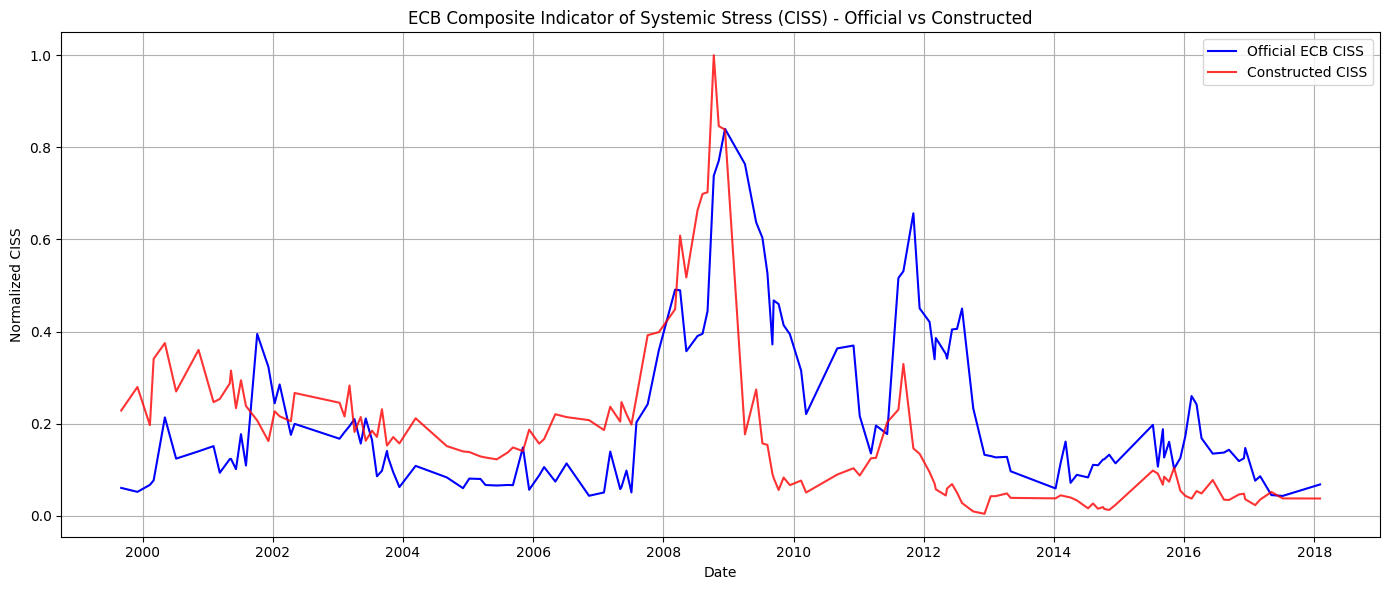

In [60]:
# Plot both on the same graph
plt.figure(figsize=(14,6))
plt.plot(comparison_df.index, comparison_df["Official ECB CISS"], label="Official ECB CISS", color="blue")
plt.plot(comparison_df.index, comparison_df["Constructed CISS"], label="Constructed CISS", color="red", alpha=0.8)
plt.title("ECB Composite Indicator of Systemic Stress (CISS) - Official vs Constructed")
plt.xlabel("Date")
plt.ylabel("Normalized CISS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

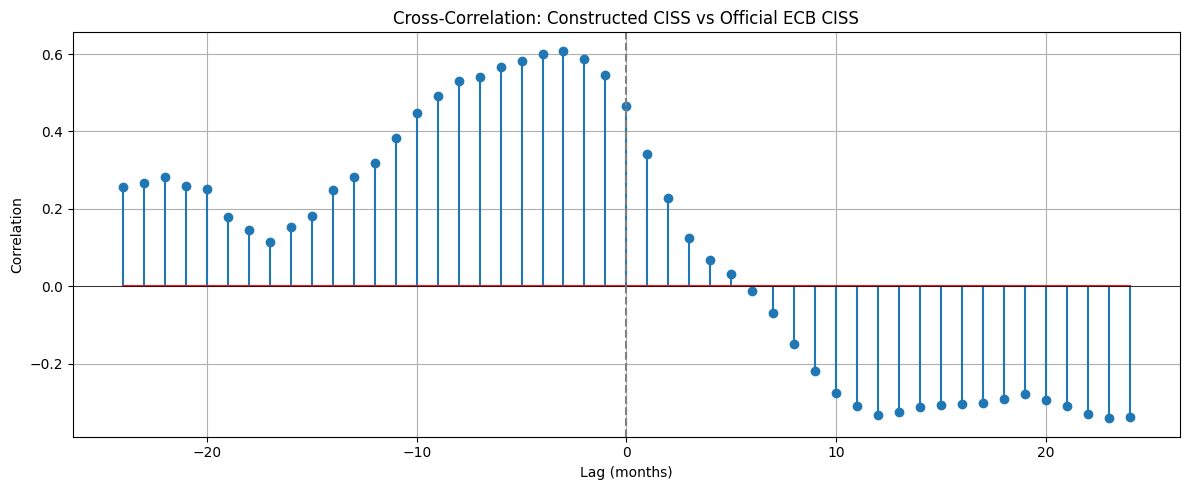

In [61]:
#Lead-Lag Correlation between newly constructed index snd official CISS

# Get the two series as NumPy arrays
official = comparison_df["Official ECB CISS"] - comparison_df["Official ECB CISS"].mean()
constructed = comparison_df["Constructed CISS"] - comparison_df["Constructed CISS"].mean()

# Define a max lag (e.g., 24 months)
max_lag = 24
lags = np.arange(-max_lag, max_lag + 1)

# Calculate cross-correlation manually for negative lags
ccf_values = [constructed.shift(-lag).corr(official) for lag in lags]

# Plot cross-correlation
plt.figure(figsize=(12, 5))
plt.stem(lags, ccf_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--')
plt.title("Cross-Correlation: Constructed CISS vs Official ECB CISS")
plt.xlabel("Lag (months)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()